In [17]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from tqdm.notebook import tqdm 

### Basic Dataset Overview

#### Check Number of Records

In [2]:
image_dir = 'datasource'
subfolder_list = os.listdir(image_dir)
subfolder_path = [os.path.join(image_dir, subfolder) for subfolder in subfolder_list]
image_path = []
for item in subfolder_path:
    for i in os.listdir(item):
        image = os.path.join(item, i)
        image_path.append(image)
total_types = len(subfolder_path)
total_counts = len(image_path)
print(f"Total Number of Sneaker Models: {total_types}")
print(f"Total Number of Images: {total_counts}")
print(f"Average Number of Images Per Sneaker Model: {round(total_counts/total_types)}")

Total Number of Sneaker Models: 50
Total Number of Images: 6480
Average Number of Images Per Sneaker Model: 130


#### Check Class Distribution

In [3]:
image_dist = {}
for subfolder in subfolder_list:
    path = os.path.join(image_dir, subfolder)
    image_dist[subfolder] = len(os.listdir(path))

sample_dist_df = pd.DataFrame.from_dict(image_dist, orient = 'index', columns = ['counts'])
sample_dist_df.reset_index(inplace = True)
sample_dist_df.rename(columns = {'index':'class'}, inplace = True)
sample_dist_df

,class,counts
0,adidas_forum_high,150
1,adidas_forum_low,115
2,adidas_gazelle,149
3,adidas_nmd_r1,115
4,adidas_samba,115
5,adidas_stan_smith,147
6,adidas_superstar,114
7,adidas_ultraboost,150
8,asics_gel-lyte_iii,91
9,converse_chuck_70_high,115


In [4]:
sample_dist_df.describe()

# class with the least number of records has 91 iamges
# class with the most number of records has 150 iamges

,counts
count,50.000000
mean,129.600000
std,19.049881
min,91.000000
25%,114.250000
50%,115.000000
75%,149.000000
max,150.000000


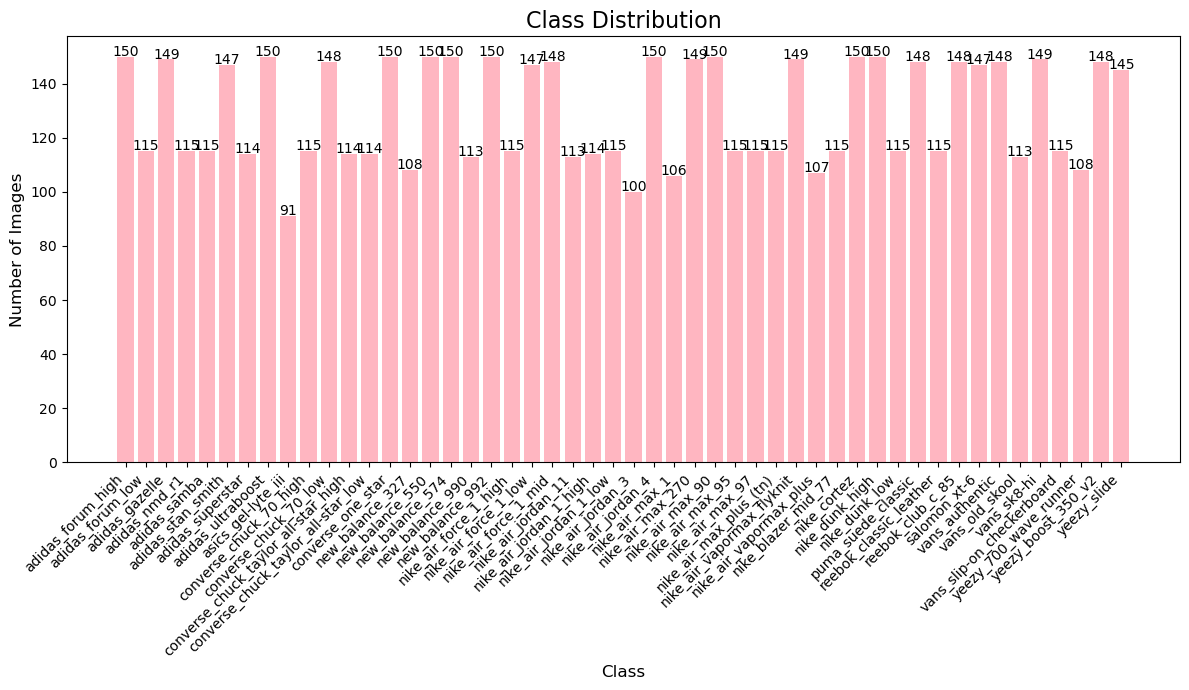

In [5]:
plt.figure(figsize=(12, 7))
plt.bar(sample_dist_df['class'], sample_dist_df['counts'], color='lightpink')
for index, row in sample_dist_df.iterrows():
    plt.text(x=index,                          
             y=row['counts'] + 0.3,            
             s=f"{row['counts']}",             
             ha='center',
             fontsize=10)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Image Attribute Analysis

In [6]:
widths = []
heights = []
channels = []
for image in image_path:
    img_cv = cv2.imread(image)
    width, height, channel= img_cv.shape[0],img_cv.shape[1], img_cv.shape[2]
    widths.append(width)
    heights.append(height)
    channels.append(channel)

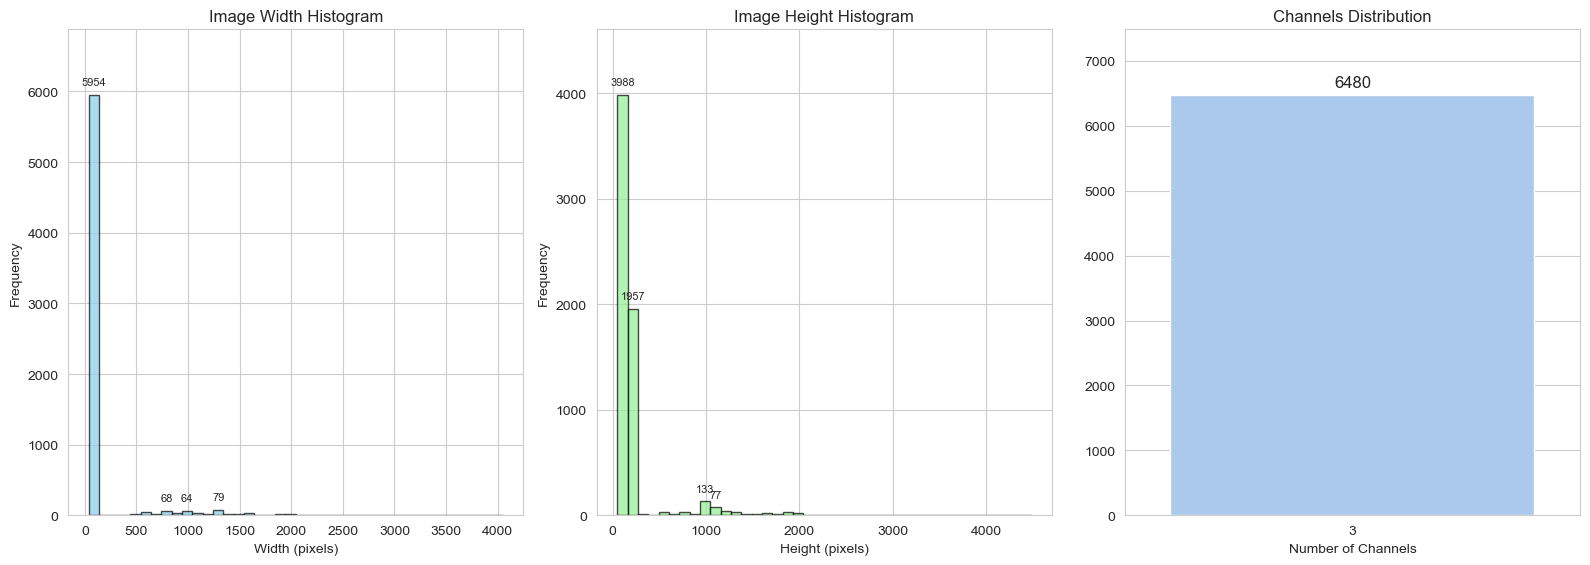

In [7]:
sns.set_style("whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
ax1.hist(widths, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Image Width Histogram', fontsize=12)
ax1.set_xlabel('Width (pixels)', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
for p in ax1.patches:
    if p.get_height() > 50:
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     fontsize=8)

ax2.hist(heights, bins=40, color='lightgreen', edgecolor='black', alpha=0.7)
ax2.set_title('Image Height Histogram', fontsize=12)
ax2.set_xlabel('Height (pixels)', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
for p in ax2.patches:
    if p.get_height() > 50:
        ax2.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     fontsize=8)
        
sns.countplot(x=channels, ax=ax3, palette='pastel', hue=channels, dodge=False, legend=False)
ax3.set_title('Channels Distribution', fontsize=12)
ax3.set_xlabel('Number of Channels', fontsize=10)
ax3.set_ylabel('')

for p in ax3.patches:
    if p.get_height() > 0:
        ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

for ax in [ax1, ax2, ax3]:
    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Pixel-level Analysis

In [12]:
pixel_values = []

for filepath in image_path:
    img = cv2.imread(filepath)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32) / 255.0 # pixel normalisation in to [0,1] # float32 will decrease RAM 
        pixel_values.append(img.reshape(-1, 3)) # reshape to compute more conveniently

all_pixels = np.concatenate(pixel_values, axis=0)

mean = np.mean(all_pixels, axis=0)
std = np.std(all_pixels, axis=0)

print("\n--- Pixel Infomation (Standardised) ---")
print(f"Mean for Images (R, G, B): {mean}")
print(f"Standard Deviation for Images (R, G, B): {std}")


--- Pixel Infomation (Standardised) ---
Mean for Images (R, G, B): [0.01622916 0.01622916 0.01622916]
Standard Deviation for Images (R, G, B): [0.12739371 0.12739371 0.12739371]


In [13]:
number_of_pixel = 0
for image in pixel_values:
    number_of_pixel += len(image)

print(number_of_pixel)

1033770007


Processing Images:   0%|          | 0/6480 [00:00<?, ?it/s]


Finished processing all images. Total pixels accumulated: 1,033,770,007


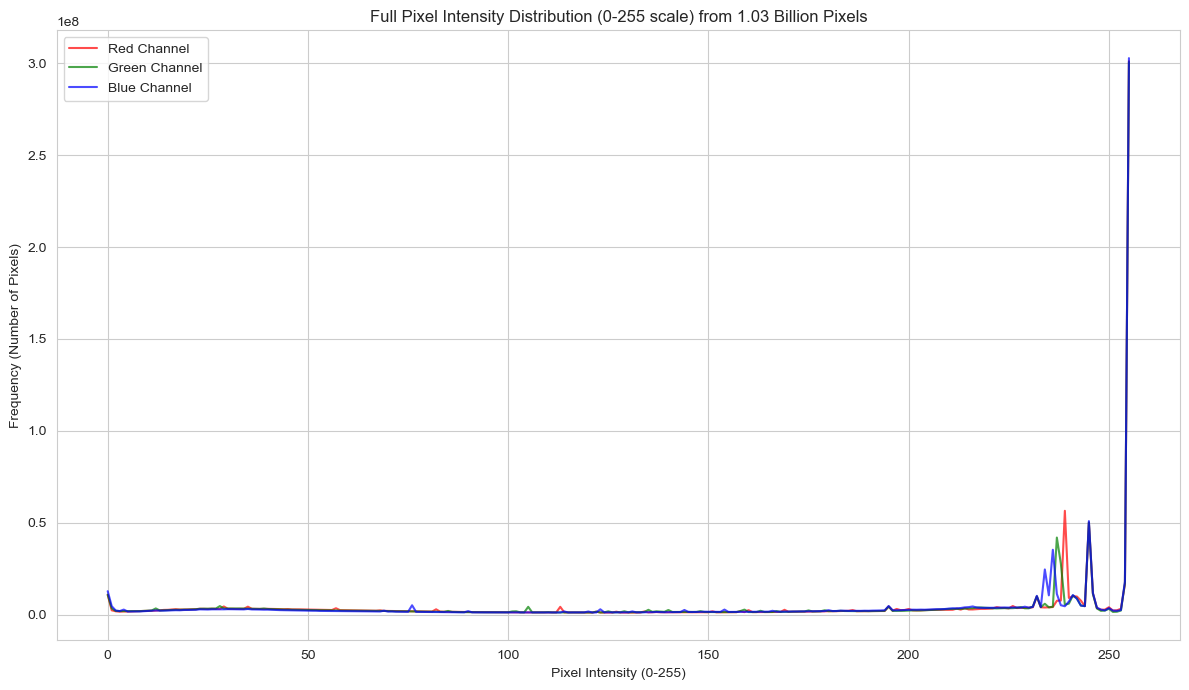

Mean for Images (R, G, B) (0-255 scale): [183.9712 183.6565 187.3866]
Standard Deviation for Images (R, G, B) (0-255 scale): [86.2106 85.9338 83.9167]


In [ ]:
hist_r_225 = np.zeros(256, dtype=np.int64)
hist_g_225 = np.zeros(256, dtype=np.int64)
hist_b_225 = np.zeros(256, dtype=np.int64)

total_pixels_processed = 0


for filepath in tqdm(image_path, desc="Processing Images"):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    pixels_225 = img.reshape(-1, 3) # (height * width, 3 channels)
    pixels_uint8_225 = pixels_225.astype(np.uint8)


    hist_b_batch_225 = np.bincount(pixels_uint8_225[:, 0], minlength=256) # Blue channel (index 0 in BGR)
    hist_g_batch_225 = np.bincount(pixels_uint8_225[:, 1], minlength=256) # Green channel (index 1 in BGR)
    hist_r_batch_225 = np.bincount(pixels_uint8_225[:, 2], minlength=256) # Red channel (index 2 in BGR)


    hist_b_225 += hist_b_batch_225
    hist_g_225 += hist_g_batch_225
    hist_r_225 += hist_r_batch_225

    total_pixels_processed += pixels_225.shape[0]

print(f"\nFinished processing all images. Total pixels accumulated: {total_pixels_processed:,}")

# plot pixel intensity histogram
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# X-axis: pixel intensity
pixel_intensity_bins = np.arange(256)

plt.plot(pixel_intensity_bins, hist_r_225, color='red', label='Red Channel', alpha=0.7)
plt.plot(pixel_intensity_bins, hist_g_225, color='green', label='Green Channel', alpha=0.7)
plt.plot(pixel_intensity_bins, hist_b_225, color='blue', label='Blue Channel', alpha=0.7)

plt.title(f'Full Pixel Intensity Distribution (0-255 scale) from {total_pixels_processed/1e9:.2f} Billion Pixels')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency (Number of Pixels)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# R Channel: Mean & STD
mean_r_225 = np.sum(hist_r_225 * pixel_intensity_bins) / np.sum(hist_r_225)
std_r_225 = np.sqrt(np.sum(hist_r_225 * (pixel_intensity_bins - mean_r_225)**2) / np.sum(hist_r_225))

# G Channel: Mean & STD
mean_g_225 = np.sum(hist_g_225 * pixel_intensity_bins) / np.sum(hist_g_225)
std_g_225 = np.sqrt(np.sum(hist_g_225 * (pixel_intensity_bins - mean_g_225)**2) / np.sum(hist_g_225))

# B Channel: Mean & STD
mean_b_225 = np.sum(hist_b_225 * pixel_intensity_bins) / np.sum(hist_b_225)
std_b_225 = np.sqrt(np.sum(hist_b_225 * (pixel_intensity_bins - mean_b_225)**2) / np.sum(hist_b_225))

print(f"Mean for Images (R, G, B) (0-255 scale): [{mean_r_225:.4f} {mean_g_225:.4f} {mean_b_225:.4f}]")
print(f"Standard Deviation for Images (R, G, B) (0-255 scale): [{std_r_225:.4f} {std_g_225:.4f} {std_b_225:.4f}]")


Processing Images:   0%|          | 0/6480 [00:00<?, ?it/s]


Finished processing all images. Total pixels accumulated: 1,033,770,007


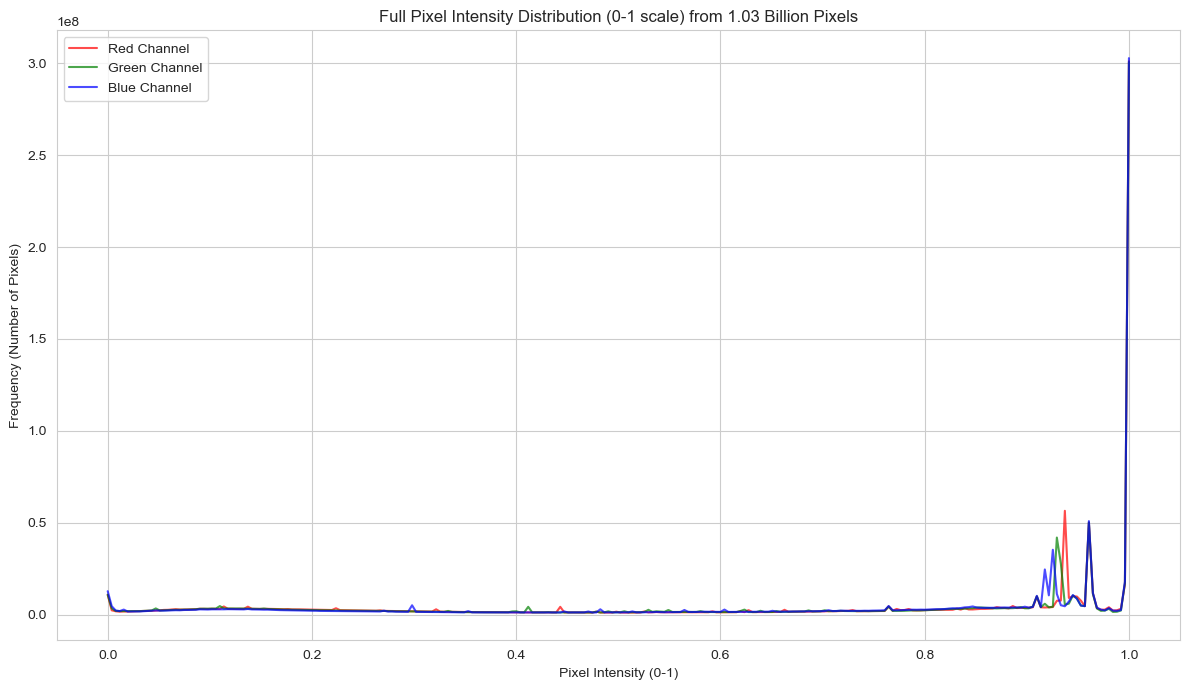

Mean for Images (R, G, B) (0-1 scale): [0.7215 0.7202 0.7348]
Standard Deviation for Images (R, G, B) (0-1 scale): [0.3381 0.3370 0.3291]


In [22]:
hist_r_norm = np.zeros(256, dtype=np.int64)
hist_g_norm = np.zeros(256, dtype=np.int64)
hist_b_norm = np.zeros(256, dtype=np.int64)

total_pixels_processed = 0


for filepath in tqdm(image_path, desc="Processing Images"):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels_norm = img.reshape(-1, 3) # (height * width, 3 channels)
    pixels_uint8_norm = pixels_norm.astype(np.uint8)

    hist_b_batch_norm = np.bincount(pixels_uint8_norm[:, 0], minlength=256) # Blue channel (index 0 in BGR)
    hist_g_batch_norm = np.bincount(pixels_uint8_norm[:, 1], minlength=256) # Green channel (index 1 in BGR)
    hist_r_batch_norm = np.bincount(pixels_uint8_norm[:, 2], minlength=256) # Red channel (index 2 in BGR)


    hist_b_norm += hist_b_batch_norm
    hist_g_norm += hist_g_batch_norm
    hist_r_norm += hist_r_batch_norm

    total_pixels_processed += pixels_norm.shape[0]
    img_norm = img.astype(np.float32) / 255.0

print(f"\nFinished processing all images. Total pixels accumulated: {total_pixels_processed:,}")

# plot pixel intensity histogram
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# X-axis: pixel intensity
pixel_intensity_bins = np.arange(256)/255.0

plt.plot(pixel_intensity_bins, hist_r_norm, color='red', label='Red Channel', alpha=0.7)
plt.plot(pixel_intensity_bins, hist_g_norm, color='green', label='Green Channel', alpha=0.7)
plt.plot(pixel_intensity_bins, hist_b_norm, color='blue', label='Blue Channel', alpha=0.7)

plt.title(f'Full Pixel Intensity Distribution (0-1 scale) from {total_pixels_processed/1e9:.2f} Billion Pixels')
plt.xlabel('Pixel Intensity (0-1)')
plt.ylabel('Frequency (Number of Pixels)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# R Channel: Mean & STD
mean_r_norm = np.sum(hist_r_norm * pixel_intensity_bins) / np.sum(hist_r_norm)
std_r_norm = np.sqrt(np.sum(hist_r_norm * (pixel_intensity_bins - mean_r_norm)**2) / np.sum(hist_r_norm))

# G Channel: Mean & STD
mean_g_norm = np.sum(hist_g_norm * pixel_intensity_bins) / np.sum(hist_g_norm)
std_g_norm = np.sqrt(np.sum(hist_g_norm * (pixel_intensity_bins - mean_g_norm)**2) / np.sum(hist_g_norm))

# B Channel: Mean & STD
mean_b_norm = np.sum(hist_b_norm * pixel_intensity_bins) / np.sum(hist_b_norm)
std_b_norm = np.sqrt(np.sum(hist_b_norm * (pixel_intensity_bins - mean_b_norm)**2) / np.sum(hist_b_norm))

print(f"Mean for Images (R, G, B) (0-1 scale): [{mean_r_norm:.4f} {mean_g_norm:.4f} {mean_b_norm:.4f}]")
print(f"Standard Deviation for Images (R, G, B) (0-1 scale): [{std_r_norm:.4f} {std_g_norm:.4f} {std_b_norm:.4f}]")

### Business Check

#### Brands Check

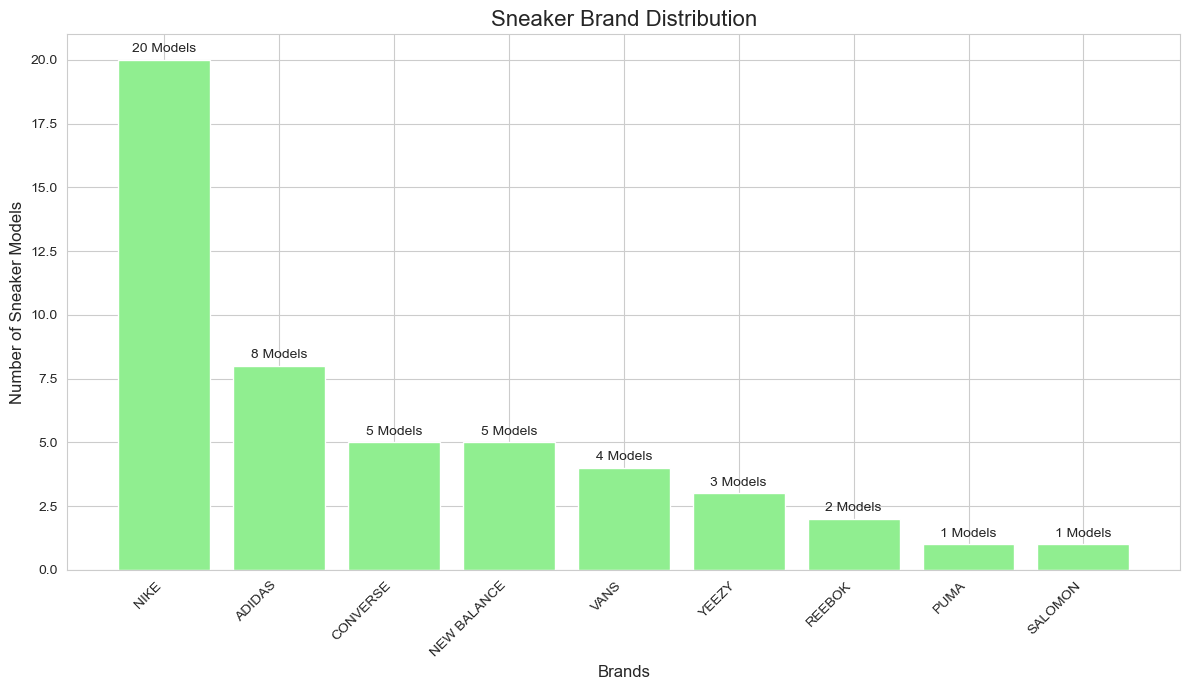

In [23]:
# check brands
famous_brands_ls = ['nike', 'adidas', 'converse', 'ascis', 'converse', 'new_balance', 'puma', 'reebok','puma', 'salomon', 'vans', 'yeezy']
def brand_check(check_list, famous_brands_ls):
    brand_dist = {}
    for sneaker in check_list:
        for brand in famous_brands_ls:
            if sneaker.startswith(brand):
                if brand == 'new_balance':
                    brand = 'new balance'
                brand = brand.upper()
                brand_dist[brand] = brand_dist.get(brand, 0) + 1
                break
    brand_df = pd.DataFrame.from_dict(brand_dist, 
                                      orient = 'index',
                                      columns=['counts'])
    brand_df.reset_index(inplace = True)
    brand_df.rename(columns = {'index' : 'brands'}, inplace = True)
    brand_df.sort_values(by = 'counts', ascending = False, inplace = True)
    brand_df.reset_index(inplace = True)
    brand_df.drop(columns = ['index'], inplace = True)
    return brand_df
brand_count_df = brand_check(subfolder_list, famous_brands_ls)

plt.figure(figsize=(12, 7))
plt.bar(brand_count_df['brands'], brand_count_df['counts'], color='lightgreen')
for index, row in brand_count_df.iterrows():
    plt.text(x=index,                          
             y=row['counts'] + 0.3,            
             s=f"{row['counts']} Models",             
             ha='center',
             fontsize=10)
plt.title('Sneaker Brand Distribution', fontsize=16)
plt.xlabel('Brands', fontsize=12)
plt.ylabel('Number of Sneaker Models', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()